<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Объединение-данных-и-создание-новых-признаков" data-toc-modified-id="Объединение-данных-и-создание-новых-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Объединение данных и создание новых признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#TabNet" data-toc-modified-id="TabNet-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>TabNet</a></span></li><li><span><a href="#Сравнение-результатов" data-toc-modified-id="Сравнение-результатов-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Сравнение результатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Промышленность. Выпускной проект

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Описание этапа обработки**

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## План работы

1) Загрузить и изучить данные

2) Предобработать данные:

- удалить или заполнить пропуски;
- привести все колонки к нужным типам данных; 

3) Провести исследовательский анализ:

- Построить гистограммы распределений всех доступных значений и найти выбросы и аномалии;
- Узнать какая связь между реактивной и активной мощностями;
- Построить точечную диаграмму распределения температур по партиям для поиска аномальных значений;

4) Создание единой таблицы со всеми признаками для обучения будущих моделей:

- Выделить среднюю активную и реактивную мощности для каждой партии;
- Выделить суммарное время нагревания электрической дуги для каждой партии;
- Выделить температуру на начало и конец измерений в каждой партии;
- Объединить эти данные с таблицами об объеме добавленных сыпучих и проволочных материалах;
- К полученым данных добавить столбец с отношением активной и реактивной мощностей и их вектовной суммой;

5) Обучить модели:
    
- Выделить из данных целевой признак (конечная температура партии);
- DecisionTree. Провести кроссвалидацию и выяснить значение метрики МАЕ (не больше 8). По этой модели получить таблицу с важностью признаков и оставить для будущих моделей самые важные;
- RandomForest. Найти наилучшие значения гиперпараметров, проведя кроссвалидацию и определев МАЕ.
- LinearRegression. Найти МАЕ с помощью кроссвалидации.
- LightGBM. Найти наилучшие значения гиперпараметров, проведя кроссвалидацию и определев МАЕ.
- Catboost. Найти наилучшие значения гиперпараметров, проведя кроссвалидацию и определев МАЕ.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from tensorflow.keras.layers import AveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data_arc = pd.read_csv('final_steel/data_arc.csv')
data_bulk = pd.read_csv('final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('final_steel/data_gas.csv')
data_temp = pd.read_csv('final_steel/data_temp.csv')
data_wire = pd.read_csv('final_steel/data_wire.csv')
data_wire_time = pd.read_csv('final_steel/data_wire_time.csv')

Выведем информацию о `data_arc`.

In [5]:
print(data_arc.info())
data_arc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


В таблице присутствуют 14876 строк и 5 столбцов. Пропусков в данных не обнаружено.

Выведем информацию о `data_bulk`.

In [6]:
print(data_bulk.info())
data_bulk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


В таблице присутствуют 3129 строк и 16 столбцов. Пропуски присутствуют во всех столбцах  кроме `key`. Это связано с тем что к различным партиям добавляют различные сыпучие материалы, вследствие чего если материал не добавляется, то в ячейке остается пропуск. Поэтому в дальнейшем будет нужно заполнить такие пропуски нулями.

Выведем информацию о `data_bulk_time`.

In [7]:
print(data_bulk_time.info())
data_bulk_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null object
Bulk 2     22 non-null object
Bulk 3     1298 non-null object
Bulk 4     1014 non-null object
Bulk 5     77 non-null object
Bulk 6     576 non-null object
Bulk 7     25 non-null object
Bulk 8     1 non-null object
Bulk 9     19 non-null object
Bulk 10    176 non-null object
Bulk 11    177 non-null object
Bulk 12    2450 non-null object
Bulk 13    18 non-null object
Bulk 14    2806 non-null object
Bulk 15    2248 non-null object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


В таблице присутствуют 3129 строк и 16 столбцов. Ситуация полностью повторяет предыдущую, с той лишь разницей, что в ячейках записано время добавления материала. Примем допущение, что время подачи материала не влияет на конечную температуру расплава и не будем учитавать эту таблицу в дальнейшей работе.

Выведем информацию о `data_wire`.

In [8]:
print(data_wire.info())
data_wire.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В таблице присутствуют 3081 строка и 10 столбцов. Пропуски присутствуют во всех столбцах  кроме `key`. Объясняется это так же как и для таблицы `data_bulk`. В дальнейшем нужно будет заполнить такие пропуски нулями.

Выведем информацию о `data_wire_time`.

In [9]:
print(data_wire_time.info())
data_wire_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Точно так же как и для таблицы `data_bulk_time` примем допущение о том, что врямо добавки материалов не влияет на конечную температуру расплава.

Выведем информацию о `data_temp`.

In [10]:
print(data_temp.info())
data_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


В таблице присутствуют 15907 строк и 3 столбца. Пропуски есть только в столбце с температурой. Для каждого `key` необходимо будет проверить наличие начальной и конечной температуры. При отсутствии хотя бы одной из них такую партию нужно убрать из дальнейшего рассмотрения.

Выведем информацию о `data_gas`.

In [11]:
print(data_gas.info())
data_gas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


В таблице присутствуют 3239 строк и 2 столбца. Пропусков не обнаружено.

### Вывод

    - Данные загружены и изучены
    - В таблицах data_gas и data_arc не обнаружено пропусков
    - Таблицы data_wire и data_bulk содержат множество пропусков, которые следует заполнить нулями
    - Таблицы data_wire_time и data_bulk_time не будут учитываться в дальнейшем решении задачи
    - Таблица data_temp нуждается в дальнейшем изучении.

## Обработка данных

Для столбцов 'Начало нагрева дугой' и 'Конец нагрева дугой' таблицы `data_arc` и 'Время замера' таблицы `data_temp` поменяем тип данных со строкового на datetime, чтобы была возможность работать со временем.

In [12]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')

In [13]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null datetime64[ns]
Конец нагрева дугой     14876 non-null datetime64[ns]
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


In [14]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null datetime64[ns]
Температура     13006 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


Далее заполним все пропущенные значения в таблицах `data_bulk` и `data_wire` нулями.

In [15]:
data_bulk = data_bulk.fillna(0)
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     3129 non-null float64
Bulk 2     3129 non-null float64
Bulk 3     3129 non-null float64
Bulk 4     3129 non-null float64
Bulk 5     3129 non-null float64
Bulk 6     3129 non-null float64
Bulk 7     3129 non-null float64
Bulk 8     3129 non-null float64
Bulk 9     3129 non-null float64
Bulk 10    3129 non-null float64
Bulk 11    3129 non-null float64
Bulk 12    3129 non-null float64
Bulk 13    3129 non-null float64
Bulk 14    3129 non-null float64
Bulk 15    3129 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [16]:
data_wire = data_wire.fillna(0)
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3081 non-null float64
Wire 2    3081 non-null float64
Wire 3    3081 non-null float64
Wire 4    3081 non-null float64
Wire 5    3081 non-null float64
Wire 6    3081 non-null float64
Wire 7    3081 non-null float64
Wire 8    3081 non-null float64
Wire 9    3081 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


### Вывод

    - В таблицах data_arc и data_temp изменен тип данных колонок со временем совершения измерений на datetime64
    - В таблицах data_bulk и data_wire пропуски были заполнены нулями.

## Исследовательский анализ

Посмотрим на гистограммы распределения сыпучих и проволочных материалов.

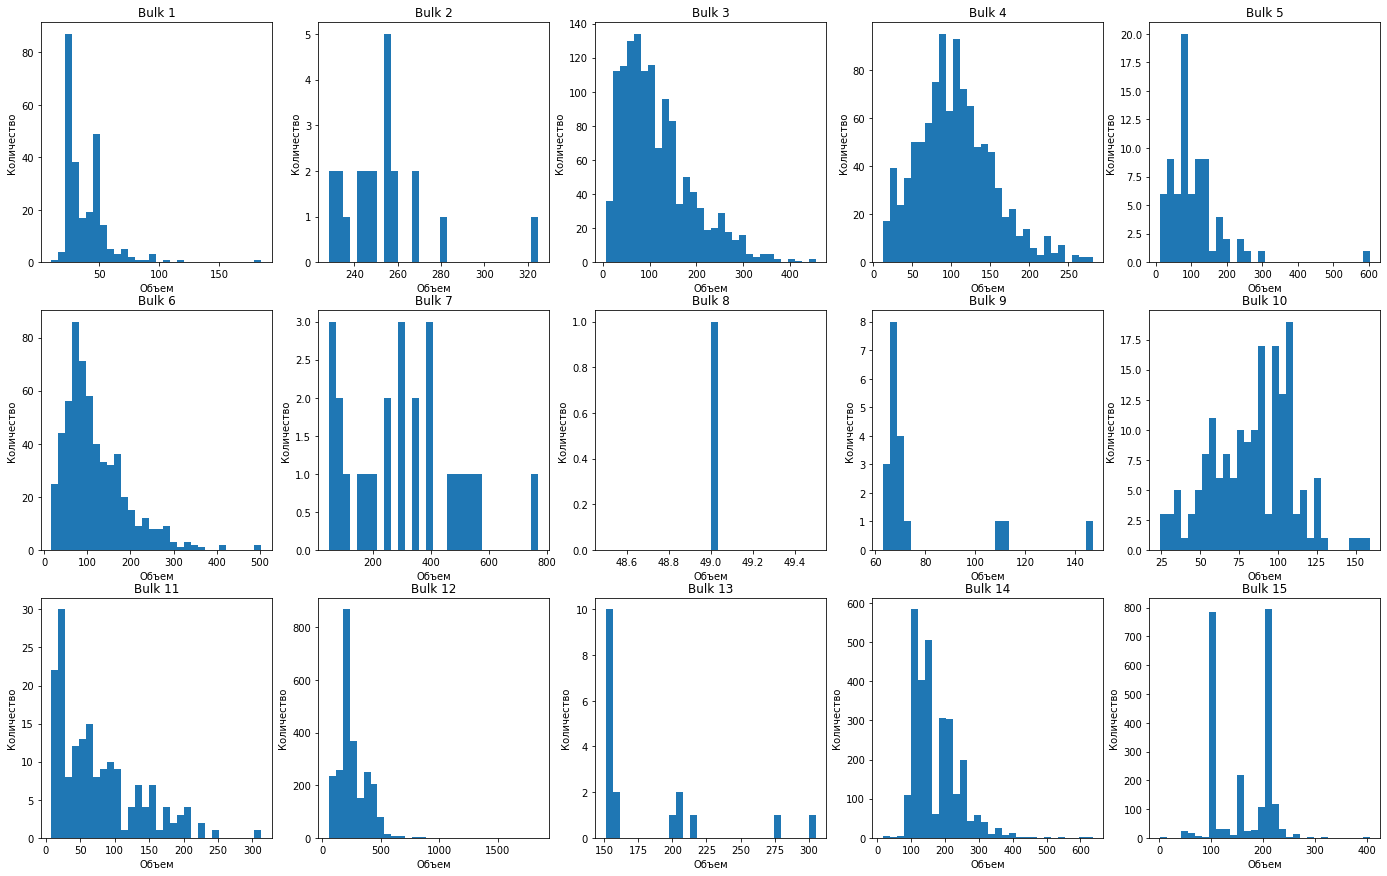

In [17]:
def histogram(df, rows, cols, x):
    i=1
    plt.figure(figsize=(rows*8, cols*3))
    for col in list(df.columns.drop('key')):
        plt.subplot(rows, cols, i)
        df[df[col] != 0][col].plot(kind='hist', bins=30)
        plt.xlabel(x)
        plt.ylabel('Количество')
        plt.title(col)
        i += 1

histogram(data_bulk, 3, 5, 'Объем')

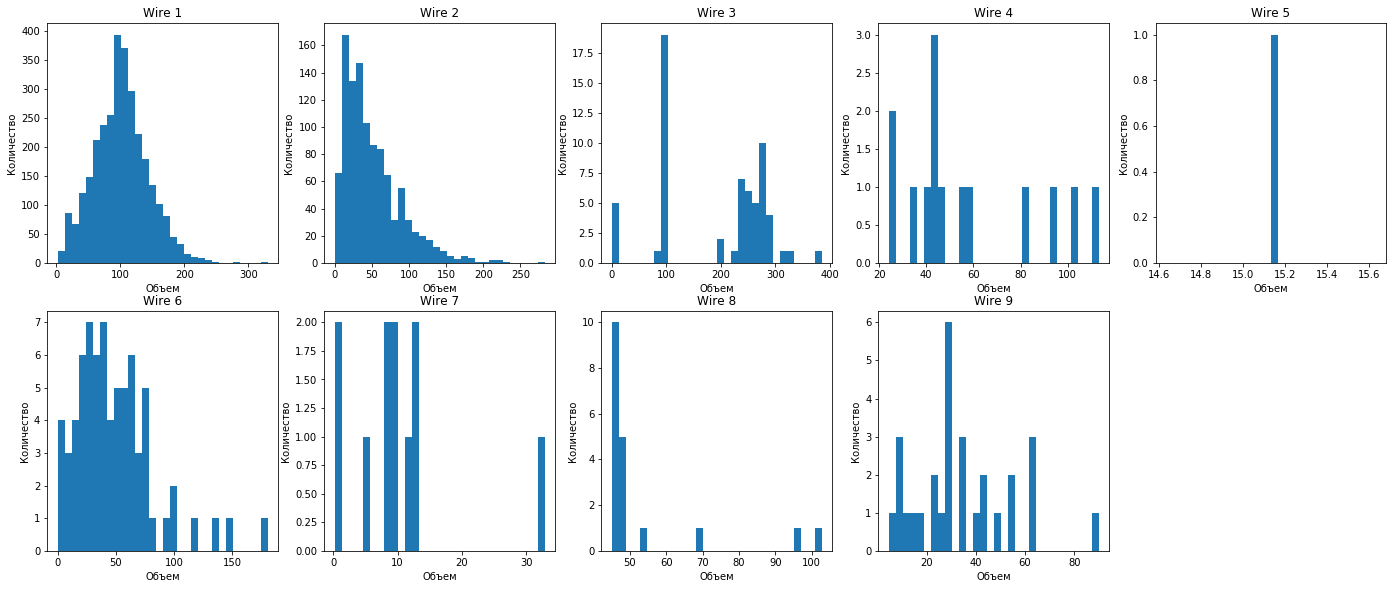

In [18]:
histogram(data_wire, 3, 5, 'Объем')

Можно заметить, что для столбцов с большим числом добавок распределения по объему близки нормальному или Пуассоновскому распределению. Для некоторых столбцов (Bulk 12 и 15) характерны явные превышающие остальные значения пики, которые расположены на "круглых" значениях объема, что скорее всего связано с человеческих желанием видеть "красивые" округленные числа. Так как таких значений много, то за аномалии это считать не будем. Для тех же столбцов, где число добавок не велико, распределение носит случайный характер. Пока что будем считать, что явных выбросов в этих таблицах нет.

Посмотрим на распределение значений активной и реактивной мощности в таблице `data_arc`.

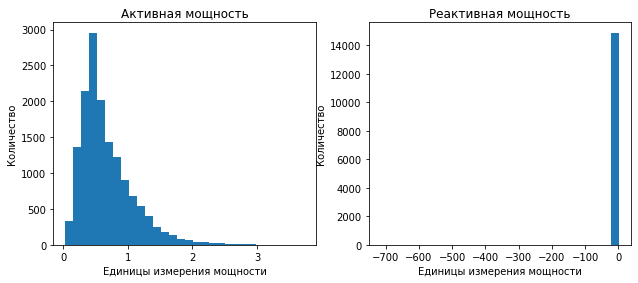

In [19]:
histogram(data_arc.drop(['Начало нагрева дугой', 'Конец нагрева дугой'], axis=1), 2, 3, 'Единицы измерения мощности')

Активная мощность представляет из себя нормальное распределение со скосом вправо. Без глубокого понимания тех.процесса нельзя сказать почему так происходит. А вот Реактивная мощность выглядит как одна единственная колонка, поэтому нужно вывести ее описание, boxplot и перестроить без учета выбросов.

In [20]:
data_arc['Реактивная мощность'].describe()

count    14876.000000
mean         0.452592
std          5.878702
min       -715.504924
25%          0.290991
50%          0.415962
75%          0.637371
max          2.676388
Name: Реактивная мощность, dtype: float64

Уже из описания видно, что значение минимальной мощности в 715 выглядит странно. Нужно взглянуть на boxplot.

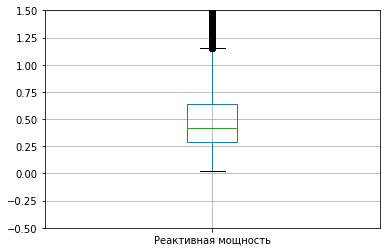

In [21]:
plt.ylim([-0.5, 1.5])
data_arc.boxplot(['Реактивная мощность'])
plt.show()

Избавимся от выбросов.

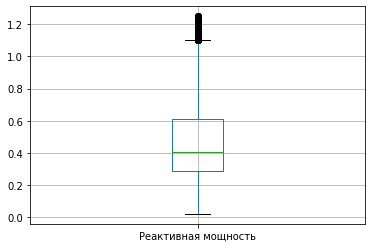

In [22]:
data_arc = data_arc[(data_arc['Реактивная мощность'] < 1.25) & (data_arc['Реактивная мощность'] > -0.25)]
data_arc.boxplot(['Реактивная мощность'])
plt.show()

Повторно построим гистограмму для реактивной мощности.

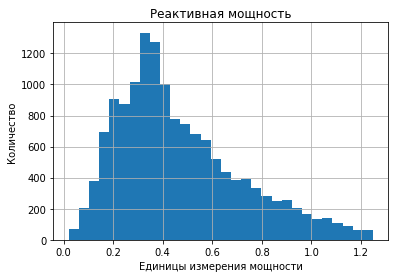

In [23]:
data_arc['Реактивная мощность'].hist(bins=30)
plt.title('Реактивная мощность')
plt.xlabel('Единицы измерения мощности')
plt.ylabel('Количество')
plt.show()

Теперь распределение похоже на нормальное со скосом вправо, как и у активной мощности.

На всякий случай проверим boxplot у Активной мощности.

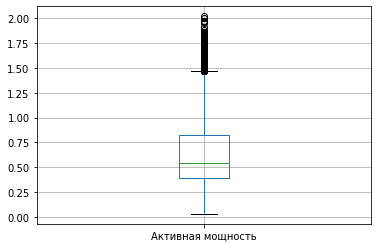

In [24]:
data_arc.boxplot(['Активная мощность'])
plt.show()

Удалим небольшое число выбросов.

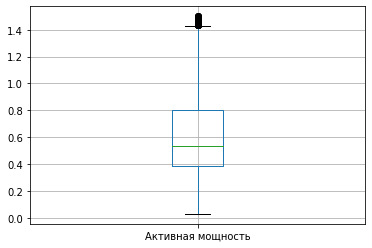

In [25]:
data_arc = data_arc[data_arc['Активная мощность'] < 1.5]
data_arc.boxplot(['Активная мощность'])
plt.show()

Проверим связь активной и реактивной мощностей.

In [26]:
print('Корреляция мощностей: {:.2%}'.format(data_arc['Активная мощность'].corr(data_arc['Реактивная мощность'])))

Корреляция мощностей: 95.26%


Обнаружена очень сильная взаимосвязь активной и реактивной мощностей. Это не удивительно, так как они являются ортогональными векторами и сумма этих векторов дает полную мощность, с которой мы будем работать в следующем разделе. Построим точечный график распределения этих величин относительно друг друга.

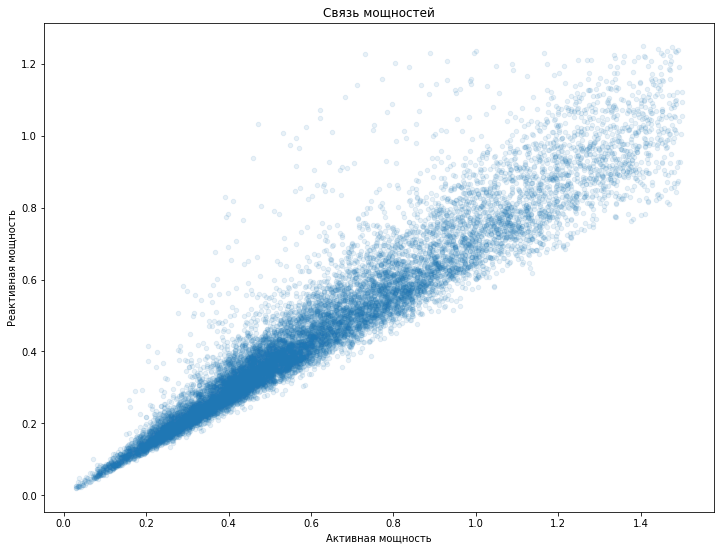

In [27]:
data_arc.plot(x='Активная мощность', y='Реактивная мощность', kind='scatter', figsize=(12, 9), alpha=0.1)
plt.title('Связь мощностей')
plt.show()

График подтверждает наличие линейной взаимосвязи этих величин.

Построим распределение данный о продувке сплава газом.

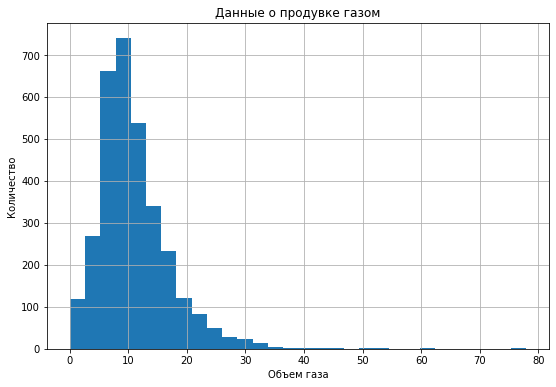

In [28]:
data_gas['Газ 1'].hist(bins=30, figsize=(9, 6))
plt.xlabel('Объем газа')
plt.ylabel('Количество')
plt.title('Данные о продувке газом')
plt.show()

Распределение близко к нормальному, но здесь явно присутсвуют выбросы.

Избавимся от них.

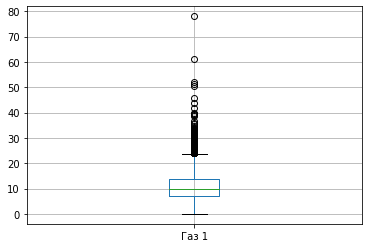

In [29]:
data_gas.boxplot('Газ 1')
plt.show()

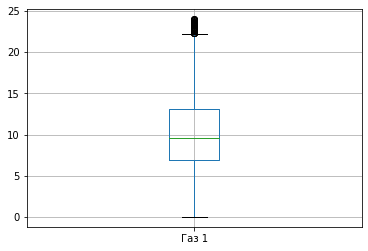

In [30]:
data_gas = data_gas[data_gas['Газ 1'] < 24]
data_gas.boxplot('Газ 1')
plt.show()

Построим гистограмму распределения температур.

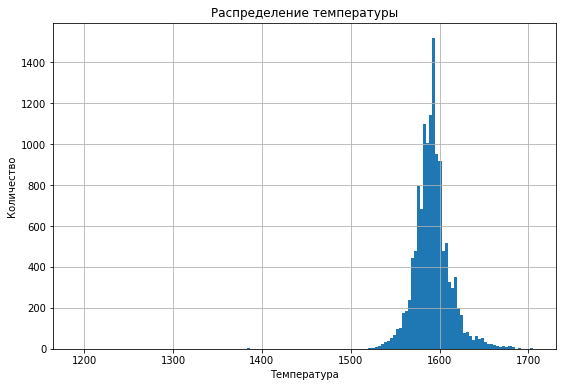

In [31]:
data_temp['Температура'].hist(bins=150, figsize=(9, 6))
plt.title('Распределение температуры')
plt.xlabel('Температура')
plt.ylabel('Количество')
plt.show()

Распределение температуры можно считать нормальным.

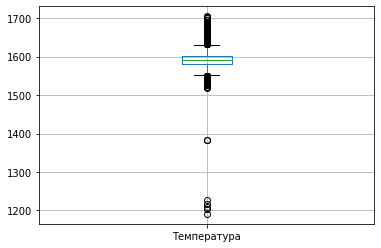

In [32]:
data_temp.boxplot('Температура')
plt.show()

В обработкой температуры следует быть аккуратным, так как дальнейшее обучение модели будет сильно зависеть от оставшихся значений. Примем решение удалить только явные выбросы (T < 1500).

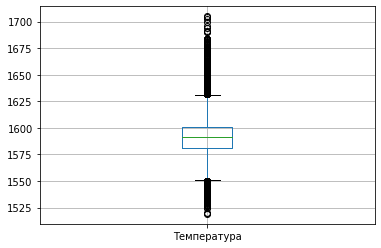

In [33]:
data_temp = data_temp[data_temp['Температура'] > 1500]
data_temp.boxplot('Температура')
plt.show()

Построим точечную диаграмму, показывающую количество измерений температуры, и узнаем, есть ли такие партии, для которых их измерено меньше 2.

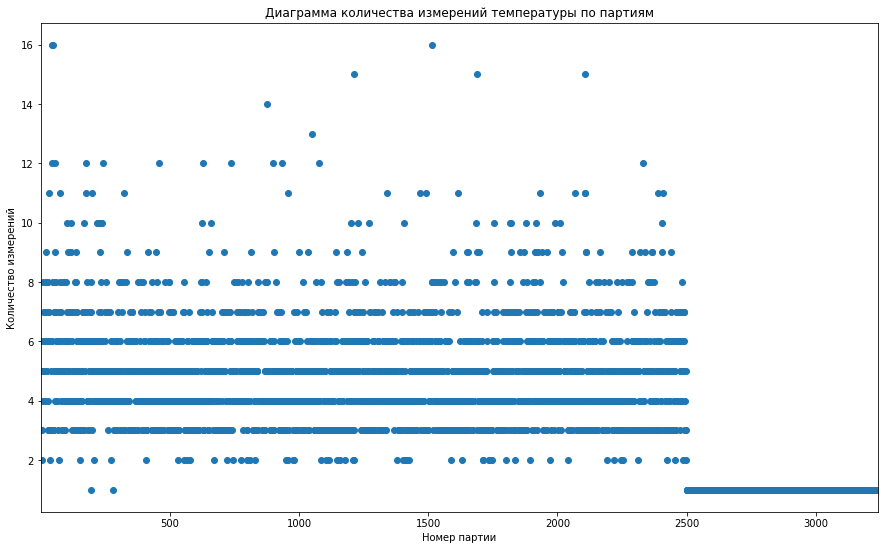

In [34]:
(data_temp['key']
 .value_counts()
 .sort_index()
 .plot(style='o', figsize=(15, 9)))
plt.title('Диаграмма количества измерений температуры по партиям')
plt.xlabel('Номер партии')
plt.ylabel('Количество измерений')
plt.show()

Избавимся от партий с 1 измерением температуры.

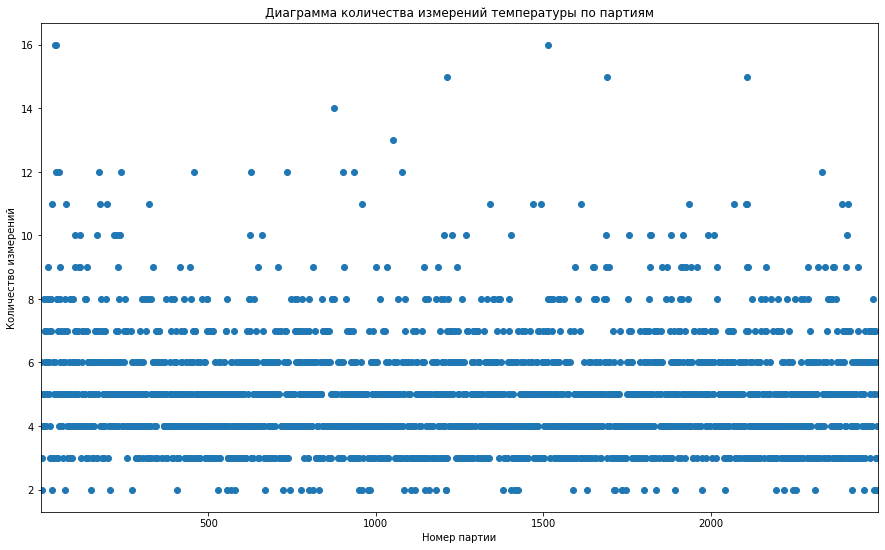

In [35]:
keys = data_temp['key'].value_counts()
keys_not_1_index = keys[keys != 1].index
data_temp = data_temp[data_temp['key'].isin(keys_not_1_index)]

(data_temp['key']
 .value_counts()
 .sort_index()
 .plot(style='o', figsize=(15, 9)))
plt.title('Диаграмма количества измерений температуры по партиям')
plt.xlabel('Номер партии')
plt.ylabel('Количество измерений')
plt.show()

In [36]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12259 entries, 0 to 12266
Data columns (total 3 columns):
key             12259 non-null int64
Время замера    12259 non-null datetime64[ns]
Температура     12259 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 383.1 KB


В таблице `data_temp` после удаления партий с одним измерением исчезли все пропуски.

### Вывод

Был проведен исследовательский анализ данных, в ходе которого выяснилось, что распределение большинства непрерывных признаков нормальное со скосом вправо или Пуассоновское при достаточном количестве объектов. Так же была обнаружена сильная линейная связь активной и реактивной мощностей, что может говорить о том, что их можно объединить в один признак без ущерба по качеству для будущих моделей. Диаграмма распределения количества измерений температуры по партиям показала, что от партии к партии количество измерений серьезно отличается, что может быть связано как со временем между первым и последним измерением, но это в работе не исследовалось, так как в дальнейшем использоваться не планируется. Выбросы и аномалии были удалены.

## Объединение данных и создание новых признаков

Теперь необходимо объединить данные в одной таблице. Но для начала получим сводную таблицу по мощности.

In [37]:
power_mean = pd.pivot_table(data_arc, index='key', values=['Активная мощность', 'Реактивная мощность'], aggfunc=['mean'])
power_mean.columns = ['Активная мощность', 'Реактивная мощность']
power_mean.head()

,Активная мощность,Реактивная мощность
key,,
1,0.804696,0.530143
2,0.763150,0.499528
3,0.505176,0.319815
4,0.802313,0.515074
5,0.575169,0.401622


Получим суммарное время и количество нагревов дуг для кажной партии.

In [38]:
time_heat = data_arc.copy()
time_heat['Разница времени'] = (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).dt.seconds
time_heat = pd.pivot_table(time_heat, index='key', values='Разница времени', aggfunc=['sum'])
time_heat.columns = ['Время нагрева дуг']
time_heat

,Время нагрева дуг
key,
1,733
2,811
3,655
4,741
5,454
...,...
3237,909
3238,546
3239,1216


Получим начальную и конечную температуру для каждой партии.

In [39]:
temp = pd.pivot_table(data_temp, index='key', values='Температура', aggfunc=['first', 'last'])
temp.columns = ['Начальная температура', 'Конечная температура']
temp.head()

,Начальная температура,Конечная температура
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0


In [40]:
dur = pd.pivot_table(data_temp, index='key', values='Время замера', aggfunc=['first', 'last'])
dur.columns = ['time first', 'time last']
dur['Время замеров'] = (dur['time last'] - dur['time first']).dt.seconds
dur = dur['Время замеров']
dur.head()

key
1     861
2    1305
3    1300
4     388
5     762
Name: Время замеров, dtype: int64

Объединим все предыдущие таблицы из этого раздела, а также `data_bulk` и `data_wire` в одну, установив за индекс столбец с номером партии `key`.

In [41]:
data = pd.DataFrame()
data = temp.merge(time_heat, on='key')
data = data.merge(dur, on='key')
data = data.merge(power_mean, on='key')
data = data.merge(data_gas, on='key')
data = data.merge(data_bulk, on='key')
data = data.merge(data_wire, on='key')
data = data.set_index('key')
data.head()

,Начальная температура,Конечная температура,Время нагрева дуг,Время замеров,Активная мощность,Реактивная мощность,Газ 1,Bulk 1,Bulk 2,Bulk 3,...,Bulk 15,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,,,,,,,,,,,,,
2,1581.0,1602.0,811,1305,0.763150,0.499528,12.555561,0.0,0.0,0.0,...,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1601.0,1625.0,741,388,0.802313,0.515074,18.841219,0.0,0.0,0.0,...,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1576.0,1602.0,454,762,0.575169,0.401622,5.413692,0.0,0.0,0.0,...,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1543.0,1596.0,554,1385,0.767345,0.484151,11.273392,0.0,0.0,0.0,...,154.0,99.109917,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1586.0,1599.0,673,1374,0.636844,0.390324,9.836267,0.0,0.0,0.0,...,154.0,98.061600,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Добавим к новой объединенной таблице новые признаки, такие как отношение активной и реактивной мощностей и их векторную сумму.

In [42]:
data['Отношение мощностей'] = round(data['Активная мощность'] / data['Реактивная мощность'], 5)

Также добавим такие признаки как энергии, расходующиеся на активную и реактивную мощности, сумму всех сыпучих и сумму всех проволочных добавок.

In [43]:
data['Энергия активная'] = data['Активная мощность'] * data['Время нагрева дуг']

In [44]:
"""
def sum_bulk_cols(row):
    s = 0
    for i in row.index:
        if 'Bulk' in i:
            s += row[i]
    return s

data['Bulk_sum'] = data.apply(sum_bulk_cols, axis=1)
data['Bulk_sum'].head()
"""

"\ndef sum_bulk_cols(row):\n    s = 0\n    for i in row.index:\n        if 'Bulk' in i:\n            s += row[i]\n    return s\n\ndata['Bulk_sum'] = data.apply(sum_bulk_cols, axis=1)\ndata['Bulk_sum'].head()\n"

In [45]:
def sum_wire_cols(row):
    s = 0
    for i in row.index:
        if 'Wire' in i:
            s += row[i]
    return s

data['Wire_sum'] = data.apply(sum_wire_cols, axis=1)
data['Wire_sum'].head()

key
2     96.052315
4     89.063515
5     98.352796
6    108.224477
7     98.061600
Name: Wire_sum, dtype: float64

Избавимся от лишних признаков коррелирующих с друг другом больше чем на 95%.

In [46]:

def features_choice(df, name_cols, col):
    k = 0
    new = name_cols
    for i in list(name_cols):
        if (abs(df[col].corr(df[i])) > 0.7) and (col != i):
            k += 1
            print('Корреляция', col, '______', i, '=', df[col].corr(df[i]))
            cols_drop.append(col)
            new = name_cols.drop(col)
            return new
    return new


In [47]:
print('Количество признаков до:', len(data.columns))
k = 0
cols_drop = []
name_cols = data.columns
for col in list(data.columns):
    if (col != 'Конечная температура'):
        name_cols = features_choice(data, name_cols, col)

name_cols

Количество признаков до: 34
Корреляция Время нагрева дуг ______ Энергия активная = 0.8990973200843184
Корреляция Активная мощность ______ Реактивная мощность = 0.907675189975841
Корреляция Реактивная мощность ______ Энергия активная = 0.7086508877046843
Корреляция Bulk 2 ______ Bulk 7 = 0.7224976788743025
Корреляция Bulk 7 ______ Wire 4 = 0.7321505683896102
Корреляция Bulk 9 ______ Wire 8 = 0.9694522590633243


Index(['Начальная температура', 'Конечная температура', 'Время замеров',
       'Газ 1', 'Bulk 1', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 8',
       'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15',
       'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7',
       'Wire 8', 'Wire 9', 'Отношение мощностей', 'Энергия активная',
       'Wire_sum'],
      dtype='object')

In [48]:
data = data[name_cols]
data.shape

(2225, 28)

## Обучение моделей

Выделим целевой и остальные признаки в разные переменные, а также разделим данные на тренировочную и тестовую выборки.

In [49]:
rnd = 123

In [50]:
t = data['Конечная температура']
f = data.drop('Конечная температура', axis=1)
f_train, f_test, t_train, t_test = train_test_split(f, t, test_size=0.25, random_state=123)

### DecisionTree

Обучим DecisionTree и получим таблицу важности признаков. Оставим только те, которые влияют на результат.

In [51]:
score_best = 100
for depth in range(3, 8):
    model = DecisionTreeRegressor(max_depth=depth, random_state=rnd)
    score = abs(cross_val_score(model, f_train, t_train, cv=5, scoring='neg_mean_absolute_error').mean())
    if score < score_best:
        score_best = score
        depth_best = depth

print('Глубина:', depth)
print('MAE:', score_best)

model = DecisionTreeRegressor(max_depth=depth_best, random_state=rnd)
model.fit(f_train, t_train)
imp = pd.DataFrame(model.feature_importances_, index=f.columns, columns=['Важность']).sort_values('Важность', ascending=False)
imp

Глубина: 7
MAE: 7.624828393536251


,Важность
Wire 1,0.277580
Начальная температура,0.197439
Bulk 15,0.157371
Время замеров,0.091019
Bulk 14,0.070929
Энергия активная,0.049763
Bulk 6,0.046446
Wire 2,0.043323
Газ 1,0.024527
Wire 4,0.023445


In [52]:
imp.nlargest(20, 'Важность')

,Важность
Wire 1,0.277580
Начальная температура,0.197439
Bulk 15,0.157371
Время замеров,0.091019
Bulk 14,0.070929
Энергия активная,0.049763
Bulk 6,0.046446
Wire 2,0.043323
Газ 1,0.024527
Wire 4,0.023445


In [53]:
f_train = f_train[imp.nlargest(11, 'Важность').index]
f_test = f_test[imp.nlargest(11, 'Важность').index]
f_test.columns

Index(['Wire 1', 'Начальная температура', 'Bulk 15', 'Время замеров',
       'Bulk 14', 'Энергия активная', 'Bulk 6', 'Wire 2', 'Газ 1', 'Wire 4',
       'Bulk 12'],
      dtype='object')

### LinearRegression

In [54]:
model = LinearRegression()
score = abs(cross_val_score(model, f_train, t_train, cv=3, scoring='neg_mean_absolute_error').mean())

print('MAE:', score)

MAE: 6.807503014309212


In [55]:
lin = {'MAE': score}

### RandomForest

Подберем параметры и обучим случайный лес.

In [56]:
model = RandomForestRegressor(random_state=rnd)
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1, 11, 1),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = RandomizedSearchCV(model, parametrs, cv=2, n_iter=100)
grid.fit(f_train, t_train)
param = grid.best_params_

In [57]:
model = RandomForestRegressor(max_depth=param['max_depth'], random_state=rnd,
                              n_estimators=param['n_estimators'],
                              min_samples_leaf=param['min_samples_leaf'], min_samples_split=param['min_samples_split'])
model.fit(f_train, t_train)
pred = model.predict(f_test)
score = mean_absolute_error(t_test, pred)
print('MAE:', score)

MAE: 6.382443344864907


In [58]:
forest = {'MAE': score}

### LightGBM

Подберем параметры и обучим модель.

In [59]:
model = LGBMRegressor(random_state=rnd)
parametrs = { 'num_iterations': range (10, 201, 10),
              'max_depth': range (1, 11, 1),
              'learning_rate': np.arange(0.01, 0.5, 0.005)}
grid = RandomizedSearchCV(model, parametrs, cv=3, n_iter=100)
grid.fit(f_train, t_train)
param = grid.best_params_

In [60]:
model = LGBMRegressor(max_depth=param['max_depth'], random_state=rnd,
                      n_estimators=param['num_iterations'], learning_rate=param['learning_rate'])
model.fit(f_train, t_train)
pred = model.predict(f_test)
score = mean_absolute_error(t_test, pred)
print('MAE:', score)

MAE: 6.3702028055669135


In [61]:
light = {'MAE': score}

### CatBoost

Подберем параметры и обучим модель.

In [62]:
model = CatBoostRegressor(random_state=rnd, verbose=False)
parametrs = { 'iterations': range (100, 1001, 100),
              'max_depth': range (1, 11, 1),
              'learning_rate': np.arange(0.01, 0.1, 0.005)}
grid = RandomizedSearchCV(model, parametrs, cv=3, n_iter=100)
grid.fit(f_train, t_train)
param = grid.best_params_

In [63]:
model = CatBoostRegressor(max_depth=param['max_depth'], random_state=rnd,
                          n_estimators=param['iterations'], learning_rate=param['learning_rate'], verbose=False)
model.fit(f_train, t_train)
pred = model.predict(f_test)
score = mean_absolute_error(t_test, pred)
print('MAE:', score)

MAE: 6.181596471369799


In [64]:
cat = {'MAE': score}

### TabNet

В качестве эксперимента обучим модель TabNetRegressor.

In [65]:
model = TabNetRegressor(verbose=0, seed=rnd, n_d=32, n_a=32)
model.fit(f_train.values, t_train.values.reshape(-1, 1), eval_metric=['mae'], max_epochs=400, patience=50, batch_size=256)
pred = model.predict(f_test.values)
score = mean_absolute_error(t_test.values.reshape(-1, 1), pred)
print('MAE:', score)

No early stopping will be performed, last training weights will be used.
MAE: 7.617788427822037


In [66]:
tab = {'MAE': score}

### Сравнение результатов

In [69]:
(pd
 .DataFrame([lin, forest, light, cat, tab], index=['LinearRegression', 'RandomForest', 'LightGBM', 'CatBoost', 'TabNet'])
 .sort_values('MAE'))

,MAE
CatBoost,6.181596
LightGBM,6.370203
RandomForest,6.382443
LinearRegression,6.807503
TabNet,7.617788


### Вывод



В этом разделе было обучено 6 моделей. Для этого были выделены самые значимые признаки на основе DecisionTree. Лучше всех себя показала модель CatBoost, но скорость подбора параметров у нее самая медленная. За ней идет LightGBM с МАЕ хуже на 0.15, но скорость обучения у нее выше в разы. Остальные модели сильно не выделились.

## Вывод

В проекте были выполнены следующие действия:
    
- Дынные были загружены и обработаны;
- Был проведен исследовательский анализ данных. Выяснилось, что распределение большинства непрерывных признаков нормальное со скосом вправо или Пуассоновское;
- Была обнаружена сильная линейная связь активной и реактивной мощностей. Было принято решение уменьшить количество признаков, чтобы среди них не было сильно коррелирующих между собой;
- Выбросы и аномалии были удалены;
- Из разных таблиц были выделены признаки, которые могут улучшить качество моделей;
- Данные были объединены в единую таблицу;
- На основе DecisionTree были выделены самые важные признаки для обучения модели;
- Были обучены модели;
- Самый лучшее качество показала модель CatBoost (МАЕ=6.18)

В результате задача научиться предсказывать значение конечной температуры расплава было выполнено с высокой точностью.